In [14]:
import numpy as np
import glob
import sys
sys.path.append("../")
import Acdc 
import Analysis 
import matplotlib.pyplot as plt 
plt.style.use("~/evanstyle.mplstyle")

# Create dictionaries for loading configurations nicely
### Also define some filepaths that should be adjusted based on your environment

In [20]:
#Structure of this dict:
#key: acdc number
#value: dict with the following keys
#   obj: Acdc object itself
#   config: configuration file path 
#   infiles: list of input data files for that board

#this set of boards is used in the July 2024 proton data at test-beam
acdcs = {44:{"obj":None, "config":"../configs/acdc44.yml", "infiles": [], "pedfiles": []}, \
        43:{"obj":None, "config":"../configs/acdc43.yml", "infiles": [], "pedfiles": []}}

#Configure some data filepaths
#you'll likely want to keep paths as we may be committing/pushing
#multiple paths. Just use a comment
datadir = "../../data/20240701ProtonDataFTBF/"


#initialize the acdc objects
for acdc_num, a in acdcs.items():
    a["obj"] = Acdc.Acdc(a["config"])

    #the configuration is now parsed, so we can find which station id
    #in order to parse the filetag at the end of the data filenames. 
    bnum = a["obj"].c["station_id"]
    #find all the data files for this board
    a["infiles"] = glob.glob(datadir + f"Raw_Proton*b{bnum}.txt")
    #find all the pedestal files for this board
    a["pedfiles"] = glob.glob(datadir + f"Raw_test*b{bnum}.txt")

    #short operation of calibrating the board based on the calibration file
    a["obj"].calibrate_board()
    a["obj"].process_files(a["infiles"][:5])



ACDC instantiated
  ACDC:    44
  LAPPD:   157
  ACC:     0
  Station: 0

ACDC voltage calibrated with VCCs
ACDC sample times calibrated

Importing data from "../../data/20240701ProtonDataFTBF/Raw_ProtonData_20240701_134450_b0.txt"
Importing data from "../../data/20240701ProtonDataFTBF/Raw_ProtonData_20240701_133333_b0.txt"
Importing data from "../../data/20240701ProtonDataFTBF/Raw_ProtonData_20240701_132327_b0.txt"
Importing data from "../../data/20240701ProtonDataFTBF/Raw_ProtonData_20240701_133130_b0.txt"
Importing data from "../../data/20240701ProtonDataFTBF/Raw_ProtonData_20240701_134848_b0.txt"
Total skipped: 100.0%
Total events analyzed: 14978
Process time duration: 29.575 s
Wall clock duration: 34.48 s
ACDC instantiated
  ACDC:    43
  LAPPD:   86
  ACC:     0
  Station: 0

ACDC voltage calibrated with VCCs
ACDC sample times calibrated

Importing data from "../../data/20240701ProtonDataFTBF/Raw_ProtonData_20240701_134450_b0.txt"
Importing data from "../../data/20240701ProtonDat

In [21]:
for acdc_num, a in acdcs.items():
    a["obj"].save_npz(datadir+f"reduced_acdc{acdc_num}.npz")

print("Finished saving files")


Finished saving files


In [22]:
ana = {}
for acdc_num, a in acdcs.items():
    ana[acdc_num] = Analysis.Analysis(datadir+f"reduced_acdc{acdc_num}.npz")



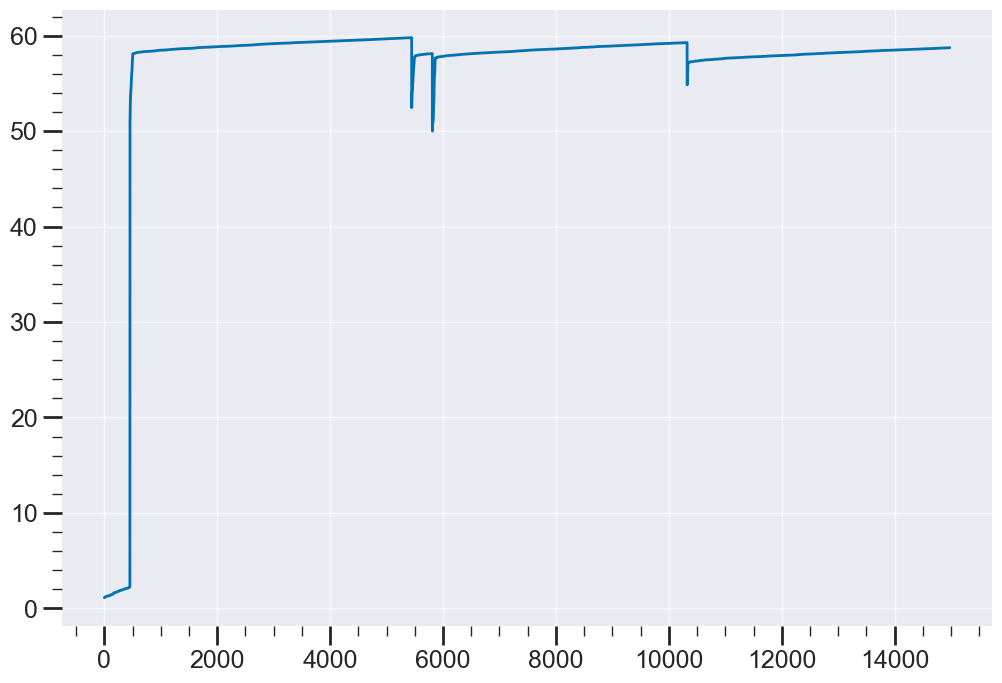

In [30]:
a = ana[43]
fig, ax = plt.subplots()
ax.plot(range(len(a.rq_dict["times_wr"])), a.rq_dict["times_wr"])
plt.show()


In [24]:
a.rq_dict["delta_t"]

array([], dtype=float64)

In [25]:
a.rq_dict

{'hpos': array([], dtype=float64),
 'vpos': array([], dtype=float64),
 'times_wr': array([], dtype=float64),
 'eventphi': array([], dtype=float64),
 'first_peak': array([], dtype=float64),
 'phi': array([], dtype=float64),
 'omega': array([], dtype=float64),
 'delta_t': array([], dtype=float64),
 'opt_chs': array([], dtype=float64),
 'chi2': array([], dtype=float64),
 'startcap': array([], dtype=float64),
 'num_skipped': array(14978)}

In [27]:
acdcs[43]["obj"].output

{'hpos': array([-237.6, -237.6, -237.6, ..., -237.6, -237.6, -237.6]),
 'vpos': array([0, 0, 0, ..., 0, 0, 0]),
 'times_wr': array([ 1.12062662,  1.12728836,  1.13145235, ..., 58.7359433 ,
        58.73615356, 58.7364637 ]),
 'eventphi': array([-3.03888889, -3.03888889, -3.03888889, ..., -3.03888889,
        -3.03888889, -3.03888889]),
 'first_peak': array([0, 0, 0, ..., 0, 0, 0]),
 'phi': array([0., 0., 0., ..., 0., 0., 0.]),
 'omega': array([0., 0., 0., ..., 0., 0., 0.]),
 'delta_t': array([0, 0, 0, ..., 0, 0, 0]),
 'opt_chs': array([0, 0, 0, ..., 0, 0, 0]),
 'chi2': array([[[0.]],
 
        [[0.]],
 
        [[0.]],
 
        ...,
 
        [[0.]],
 
        [[0.]],
 
        [[0.]]]),
 'startcap': array([208, 144,  80, ..., 112,  16,  80]),
 'num_skipped': 0}